In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## 1.Data
Kita punya data label sebenarnya dan probabilitas prediksi yang ingin kita petakan prediksinya di berbagai treshold

In [3]:
y_true = [1,1,0,1,0,0,1,0,0]  # label
y_score = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]  # probabilitas
treshold = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1] # treshold untuk aturan klasisifikasi

In [4]:
df = pd.DataFrame({
    'actual': y_true,
    'pred_prob': y_score
})

## 2. Generate Kolom Prediksi di berbagai Treshold
Jika treshold ditentukan 0.9, maka jika probabilitas_prediksi > 0.9 maka prediksi = 1 jika tidak 0

In [6]:
def prediksi(df):
    if df['pred_prob'] >= df['treshold']:
        return 1
    else:
        return 0

In [7]:
## contoh untuk 1 treshold saja
df['treshold'] = 0.9
df['prediction'] = df.apply(prediksi,axis=1)

In [8]:
df

,actual,pred_prob,treshold,prediction
0,1,0.9,0.9,1
1,1,0.8,0.9,0
2,0,0.7,0.9,0
3,1,0.6,0.9,0
4,0,0.5,0.9,0
5,0,0.4,0.9,0
6,1,0.3,0.9,0
7,0,0.2,0.9,0
8,0,0.1,0.9,0


In [9]:
## Looping untuk semua treshold
ls_pred = []
for treshold_value in treshold:
    df2 = df.copy() # agar treshold selalu berganti
    df2['treshold'] = treshold_value
    df2['prediction'] = df2.apply(prediksi,axis=1)
    ls_pred.append(df2)

In [10]:
df_predict = pd.concat(ls_pred)

In [11]:
df_predict

,actual,pred_prob,treshold,prediction
0,1,0.9,0.9,1
1,1,0.8,0.9,0
2,0,0.7,0.9,0
3,1,0.6,0.9,0
4,0,0.5,0.9,0
...,...,...,...,...
4,0,0.5,0.1,1
5,0,0.4,0.1,1
6,1,0.3,0.1,1
7,0,0.2,0.1,1


In [12]:
df_predict[df_predict.treshold==0.8]

,actual,pred_prob,treshold,prediction
0,1,0.9,0.8,1
1,1,0.8,0.8,1
2,0,0.7,0.8,0
3,1,0.6,0.8,0
4,0,0.5,0.8,0
5,0,0.4,0.8,0
6,1,0.3,0.8,0
7,0,0.2,0.8,0
8,0,0.1,0.8,0


In [13]:
df_predict[df_predict.treshold==0.5]

,actual,pred_prob,treshold,prediction
0,1,0.9,0.5,1
1,1,0.8,0.5,1
2,0,0.7,0.5,1
3,1,0.6,0.5,1
4,0,0.5,0.5,1
5,0,0.4,0.5,0
6,1,0.3,0.5,0
7,0,0.2,0.5,0
8,0,0.1,0.5,0


In [14]:
df_predict[df_predict.treshold==0.3]

,actual,pred_prob,treshold,prediction
0,1,0.9,0.3,1
1,1,0.8,0.3,1
2,0,0.7,0.3,1
3,1,0.6,0.3,1
4,0,0.5,0.3,1
5,0,0.4,0.3,1
6,1,0.3,0.3,1
7,0,0.2,0.3,0
8,0,0.1,0.3,0


In [15]:
## Menghitung TPR dan FPR

In [16]:
def label(df):
    if (df['prediction'] == 1) & (df['actual'] == 1):
        return 'TP'
    if (df['prediction'] == 1) & (df['actual'] == 0):
        return 'FP'
    if (df['prediction'] == 0) & (df['actual'] == 1):
        return 'FN'
    if (df['prediction'] == 0) & (df['actual'] == 0):
        return 'TN'

In [17]:
df_predict['status'] =  df_predict.apply(label,axis=1)

In [18]:
df_predict

,actual,pred_prob,treshold,prediction,status
0,1,0.9,0.9,1,TP
1,1,0.8,0.9,0,FN
2,0,0.7,0.9,0,TN
3,1,0.6,0.9,0,FN
4,0,0.5,0.9,0,TN
...,...,...,...,...,...
4,0,0.5,0.1,1,FP
5,0,0.4,0.1,1,FP
6,1,0.3,0.1,1,TP
7,0,0.2,0.1,1,FP


In [19]:
df_predict_treshold_09 = df_predict[df_predict.treshold==0.9]
df_predict_treshold_09

,actual,pred_prob,treshold,prediction,status
0,1,0.9,0.9,1,TP
1,1,0.8,0.9,0,FN
2,0,0.7,0.9,0,TN
3,1,0.6,0.9,0,FN
4,0,0.5,0.9,0,TN
5,0,0.4,0.9,0,TN
6,1,0.3,0.9,0,FN
7,0,0.2,0.9,0,TN
8,0,0.1,0.9,0,TN


In [20]:
# Menghitung total TP,FP,TN,FN di treshold 0.9
len_TP = len(df_predict_treshold_09[df_predict_treshold_09.status=='TP'])
len_FP = len(df_predict_treshold_09[df_predict_treshold_09.status=='FP'])
len_TN = len(df_predict_treshold_09[df_predict_treshold_09.status=='TN'])
len_FN = len(df_predict_treshold_09[df_predict_treshold_09.status=='FN'])

In [21]:
print(len_TP,len_FP,len_TN,len_FN)

1 0 5 3


In [22]:
# Menghitung total TP,FP,TN,FN di berbagai treshold
ls_tpr_fpr = []
for treshold_value in treshold:
    df_temp = df_predict[df_predict.treshold==treshold_value]
    len_TP = len(df_temp[df_temp.status=='TP'])
    len_FP = len(df_temp[df_temp.status=='FP'])
    len_TN = len(df_temp[df_temp.status=='TN'])
    len_FN = len(df_temp[df_temp.status=='FN'])
    ls_tpr_fpr.append([treshold_value,len_TP,len_FP,len_TN,len_FN])

In [23]:
df_tpr_fpr = pd.DataFrame(ls_tpr_fpr,columns=['treshold','TP','FP','TN','FN'])

In [24]:
df_tpr_fpr['TPR'] = df_tpr_fpr['TP']/(df_tpr_fpr['TP'] + df_tpr_fpr['FN'])
df_tpr_fpr['FPR'] = df_tpr_fpr['FP']/(df_tpr_fpr['FP'] + df_tpr_fpr['TN'])

In [25]:
df_tpr_fpr

,treshold,TP,FP,TN,FN,TPR,FPR
0,0.9,1,0,5,3,0.25,0.0
1,0.8,2,0,5,2,0.50,0.0
2,0.7,2,1,4,2,0.50,0.2
3,0.6,3,1,4,1,0.75,0.2
4,0.5,3,2,3,1,0.75,0.4
5,0.4,3,3,2,1,0.75,0.6
6,0.3,4,3,2,0,1.00,0.6
7,0.2,4,4,1,0,1.00,0.8
8,0.1,4,5,0,0,1.00,1.0


In [26]:
## menambahkan titik (0.0) dan (1.1) -> karena selalu ada
fpr = [0] + list(df_tpr_fpr['FPR']) + [1]
tpr = [0] + list(df_tpr_fpr['TPR']) + [1]

In [27]:
fpr

[0, 0.0, 0.0, 0.2, 0.2, 0.4, 0.6, 0.6, 0.8, 1.0, 1]

In [28]:
tpr

[0, 0.25, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1]

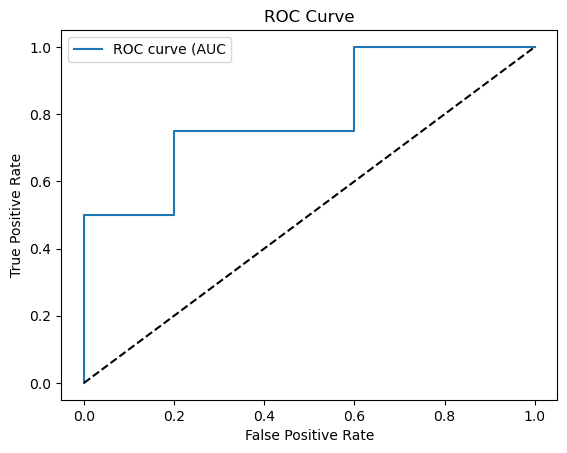

In [29]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3. ROC via sklearn

In [31]:
y_true = [1,1,0,1,0,0,1,0,0]  # label
y_score = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]  # probabilitas
treshold = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1] # treshold untuk aturan klasisifikasi

In [32]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

In [33]:
fpr

array([0. , 0. , 0. , 0.2, 0.2, 0.6, 0.6, 1. ])

In [34]:
tpr

array([0.  , 0.25, 0.5 , 0.5 , 0.75, 0.75, 1.  , 1.  ])

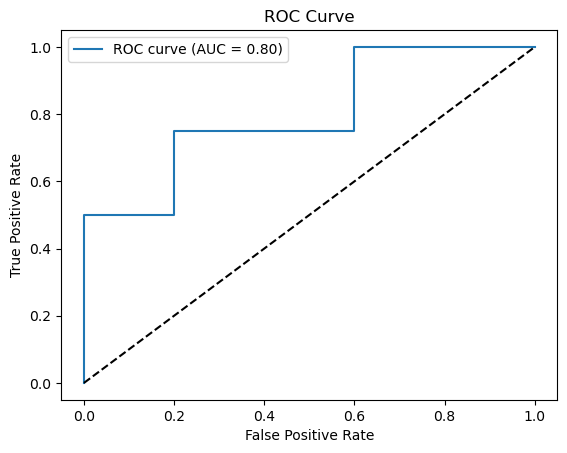

In [35]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 4. AUC = 1 

In [37]:
from sklearn.metrics import roc_curve, auc
import numpy as np

In [38]:
y1_true = np.array([1,1,1,1,1,0,0,0,0,0])
y1_score = np.array([0.99,0.98,0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4])

In [39]:
treshold_all = [0.99,0.85,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
ls_auc_1 = []
print("Threshold | TP | FP | TN | FN | TPR | FPR")
print("-" * 41)
for t in treshold_all:
    y_pred1 = (y1_score >= t).astype(int)
    TP = np.sum((y_pred1 == 1) & (y1_true == 1))
    FP = np.sum((y_pred1 == 1) & (y1_true == 0))
    TN = np.sum((y_pred1 == 0) & (y1_true == 0))
    FN = np.sum((y_pred1 == 0) & (y1_true == 1))
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    ls_auc_1.append([t,TP,FP,TN,FN])
    print(f"{t:2.2f} | {TP:2} | {FP:2} | {TN:2} | {FN:2} | {TPR:2} | {FPR:2} ")

Threshold | TP | FP | TN | FN | TPR | FPR
-----------------------------------------
0.99 |  1 |  0 |  5 |  4 | 0.2 | 0.0 
0.85 |  5 |  0 |  5 |  0 | 1.0 | 0.0 
0.70 |  5 |  2 |  3 |  0 | 1.0 | 0.4 
0.60 |  5 |  3 |  2 |  0 | 1.0 | 0.6 
0.50 |  5 |  4 |  1 |  0 | 1.0 | 0.8 
0.40 |  5 |  5 |  0 |  0 | 1.0 | 1.0 
0.30 |  5 |  5 |  0 |  0 | 1.0 | 1.0 
0.20 |  5 |  5 |  0 |  0 | 1.0 | 1.0 
0.10 |  5 |  5 |  0 |  0 | 1.0 | 1.0 


selama ada setidaknya satu threshold yang bisa memisahkan sempurna (yakni treshold = 0.85) -> **AUC= 1**

In [41]:
df_tpr_fpr1 = pd.DataFrame(ls_auc_1,columns = ['treshold','TP','FP','TN','FN'])

In [42]:
df_tpr_fpr1['TPR'] = df_tpr_fpr1['TP']/(df_tpr_fpr1['TP'] + df_tpr_fpr1['FN'])
df_tpr_fpr1['FPR'] = df_tpr_fpr1['FP']/(df_tpr_fpr1['FP'] + df_tpr_fpr1['TN'])

In [43]:
df_tpr_fpr1

,treshold,TP,FP,TN,FN,TPR,FPR
0,0.99,1,0,5,4,0.2,0.0
1,0.85,5,0,5,0,1.0,0.0
2,0.70,5,2,3,0,1.0,0.4
3,0.60,5,3,2,0,1.0,0.6
4,0.50,5,4,1,0,1.0,0.8
5,0.40,5,5,0,0,1.0,1.0
6,0.30,5,5,0,0,1.0,1.0
7,0.20,5,5,0,0,1.0,1.0
8,0.10,5,5,0,0,1.0,1.0


In [44]:
## menambahkan titik (0.0) dan (1.1) -> karena selalu ada
fpr1 = [0] + list(df_tpr_fpr1['FPR']) + [1]
tpr1 = [0] + list(df_tpr_fpr1['TPR']) + [1]

In [45]:
fpr1

[0, 0.0, 0.0, 0.4, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 1]

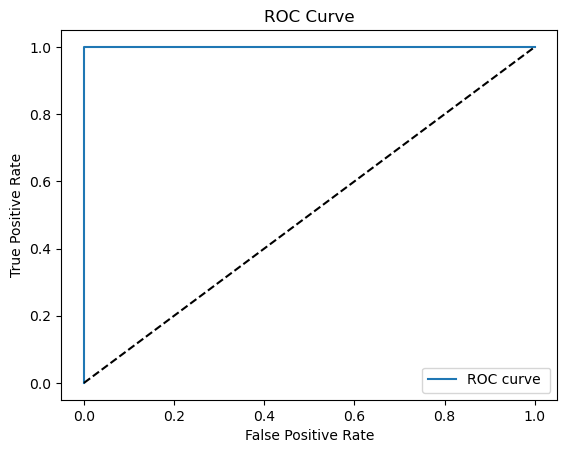

In [46]:
plt.plot(fpr1, tpr1, label=f'ROC curve ')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. AUC = 0

In [48]:
from sklearn.metrics import roc_curve, auc
import numpy as np

y2_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y2_score = np.array([0.99, 0.98, 0.95, 0.90, 0.85, 0.80, 0.70, 0.60, 0.50, 0.40])

fpr2, tpr2, thresholds2 = roc_curve(y2_true, y2_score)
auc_score2 = auc(fpr2, tpr2)

print("AUC =", auc_score2)
print("Thresholds:", thresholds2)

AUC = 0.0
Thresholds: [ inf 0.99 0.85 0.4 ]


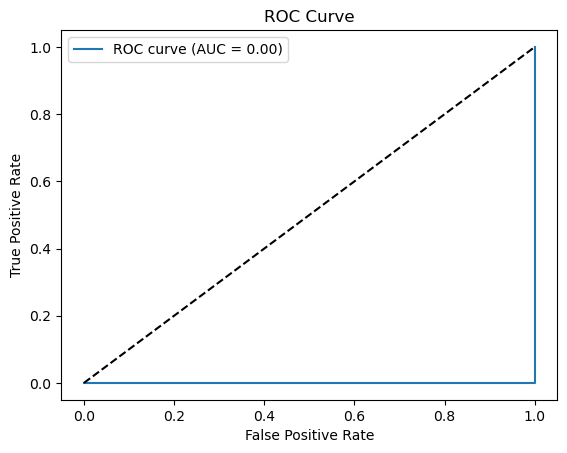

In [49]:
plt.plot(fpr2, tpr2, label=f'ROC curve (AUC = {auc_score2:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()